<a href="https://colab.research.google.com/github/Aqfa07/ML-Project/blob/main/Project%203%3A%20Multilayer%20Perceptron%20from%20Scratch.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)



Test Accuracy: 1.0000


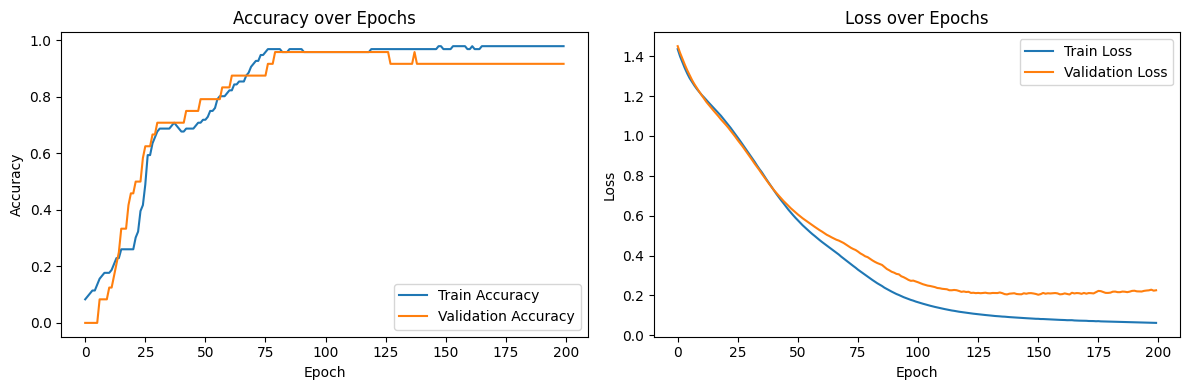

In [9]:
import tensorflow as tf
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder, StandardScaler
import matplotlib.pyplot as plt

# Load Iris dataset
iris = load_iris()
X = iris.data  # Features: sepal & petal length/width
y = iris.target.reshape(-1, 1)  # Labels: 0, 1, 2

# One-hot encode labels for multi-class classification
encoder = OneHotEncoder(sparse_output=False)
y_encoded = encoder.fit_transform(y)  # Convert to one-hot format

# Standardize features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)  # Normalize features

# Split into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(
    X_scaled, y_encoded, test_size=0.2, random_state=42
)

# Define the MLP model
model = tf.keras.Sequential([
    tf.keras.layers.Dense(10, activation='relu', input_shape=(4,)),  # First hidden layer
    tf.keras.layers.Dense(8, activation='relu'),  # Second hidden layer
    tf.keras.layers.Dense(3, activation='softmax')  # Output layer
])

# Compile the model
model.compile(
    optimizer='adam',
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

# Train the model and store history
history = model.fit(
    X_train,
    y_train,
    epochs=200,
    batch_size=16,
    validation_split=0.2,
    verbose=0
)

# Evaluate the model on the test set
loss, acc = model.evaluate(X_test, y_test, verbose=0)
print(f"\nTest Accuracy: {acc:.4f}")

# Plot training history
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Accuracy over Epochs')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Loss over Epochs')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend()
plt.tight_layout()
plt.show()